In [1]:
# Random Forest algorithm to classify network traffic 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = "KaggleImbalanced.csv"
df = pd.read_csv(filepath)

In [3]:
# df
# partial_data = df[:100000]
# df = partial_data

In [4]:
feats = [x for x in df.columns if x != 'ProtocolName']
X = df[feats]
Y = df['ProtocolName']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [6]:
# X_train
# y_train.unique()
# test_file= pd.merge(X_test,y_test,how = 'left',left_index = True, right_index = True)
# X_test.to_csv('test_file.csv', index=False)
# test_file.to_csv('test_file.csv', index=False)
# test_file.columns[:-1]

In [6]:
dt.tree_.node_count, dt.tree_.max_depth

(105, 17)

In [7]:
dt.score(X_test, y_test)

0.9999841459837814

In [18]:
rf = RandomForestClassifier()

In [19]:
%%time
rf.fit(X_train , y_train)

Wall time: 4min 58s


RandomForestClassifier()

In [20]:
# rf.tree_.node_count, rf.tree_.max_depth

In [13]:
%%time
rf.score(X_test, y_test)

0.9920666666666667

In [14]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

       AMAZON       0.99      1.00      0.99      2985
        APPLE       0.98      0.98      0.98      2993
 APPLE_ICLOUD       0.99      0.99      0.99      2987
 APPLE_ITUNES       0.99      0.99      0.99      3073
CITRIX_ONLINE       1.00      1.00      1.00        10
   CLOUDFLARE       1.00      1.00      1.00      3020
CONTENT_FLASH       1.00      0.99      1.00      2973
       DEEZER       0.92      0.52      0.67        21
          DNS       1.00      1.00      1.00      2989
      DROPBOX       0.99      0.98      0.98      2998
     EASYTAXI       1.00      1.00      1.00      3017
         EBAY       0.99      1.00      0.99      2934

     accuracy                           0.99     30000
    macro avg       0.99      0.95      0.97     30000
 weighted avg       0.99      0.99      0.99     30000



In [11]:
# model = RandomForestClassifier()
# param_grid = {'max_depth':[30,40,50],
#               'n_estimators':[20,30,40,50],  
#               'max_features':['auto','log2'],
#               'criterion':['gini','entropy']}
# GR = GridSearchCV(estimator = model, param_grid = param_grid, scoring='accuracy', cv=6)

In [12]:
# GR.fit(X, Y)

In [14]:
# GR.best_score_

In [15]:
# GR.best_params_

In [7]:
rf = RandomForestClassifier(max_depth=60, n_estimators=100, max_features='auto', criterion='entropy')

In [8]:
%%time
rf.fit(X_train, y_train)

Wall time: 10min 46s


RandomForestClassifier(criterion='entropy', max_depth=60)

In [9]:
%%time
rf.score(X_test, y_test)

Wall time: 11.2 s


0.9710267853604014

In [10]:
class_list = df['ProtocolName'].unique()

In [12]:
import time

In [13]:
model_output = {}
for label in class_list:
    model_output.setdefault(label, [])
    myDataFrame = df[df['ProtocolName']==label]
    samples = len(myDataFrame)
    myFeats = [x for x in myDataFrame.columns if x != 'ProtocolName']
    X_features = myDataFrame[myFeats]
#     X_features = scaler.fit_transform(X_features)
    myLabel = myDataFrame['ProtocolName']
    tic = time.time()
#     my_predict = np.argmax(model.predict(X_features), axis=-1)
    predicted_class = rf.predict(X_features)
    toc = time.time()
    confidence_score = np.max(rf.predict(X_features))
#     predicted_class = encoder.inverse_transform(my_predict)
    time_taken = toc-tic
    my_acc = accuracy_score(myLabel, predicted_class) 
    model_output[label].append(predicted_class)
    model_output[label].append(time_taken)
    model_output[label].append(samples)
    model_output[label].append(my_acc)
    model_output[label].append(confidence_score)
    

In [14]:
print(model_output['GOOGLE_MAPS'])

[array(['GOOGLE_MAPS', 'GOOGLE_MAPS', 'GOOGLE_MAPS', ..., 'GOOGLE_MAPS',
       'GOOGLE_MAPS', 'GOOGLE_MAPS'], dtype=object), 0.7585673332214355, 10000, 0.9961, 'YOUTUBE']


In [15]:
with  open("Evaluation3.txt", 'w+') as f:
    for label in model_output.keys():
        f.write(label +"\t" + str(round(model_output[label][1], 2)) + "\t" + str(model_output[label][2]) + "\t" + str(round(model_output[label][3]*100, 2)) + "\n")
f.close()

In [19]:
%%time
y_pred = rf.predict(X_test)

Wall time: 10.8 s


In [20]:
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

           AMAZON       0.96      0.96      0.96      2958
            APPLE       0.96      0.95      0.95      2977
     APPLE_ICLOUD       0.99      0.99      0.99      2950
     APPLE_ITUNES       0.98      0.98      0.98      3062
    CITRIX_ONLINE       1.00      1.00      1.00        11
       CLOUDFLARE       0.96      0.96      0.96      3046
    CONTENT_FLASH       1.00      0.99      0.99      2950
           DEEZER       0.88      0.39      0.54        18
              DNS       1.00      0.99      1.00      2990
          DROPBOX       0.95      0.91      0.93      3028
         EASYTAXI       0.98      0.99      0.98      3083
             EBAY       0.98      0.98      0.98      3025
          EDONKEY       1.00      0.70      0.83        27
         FACEBOOK       0.94      0.96      0.95      2932
      FTP_CONTROL       0.75      0.67      0.71         9
         FTP_DATA       0.99      1.00      0.99      3

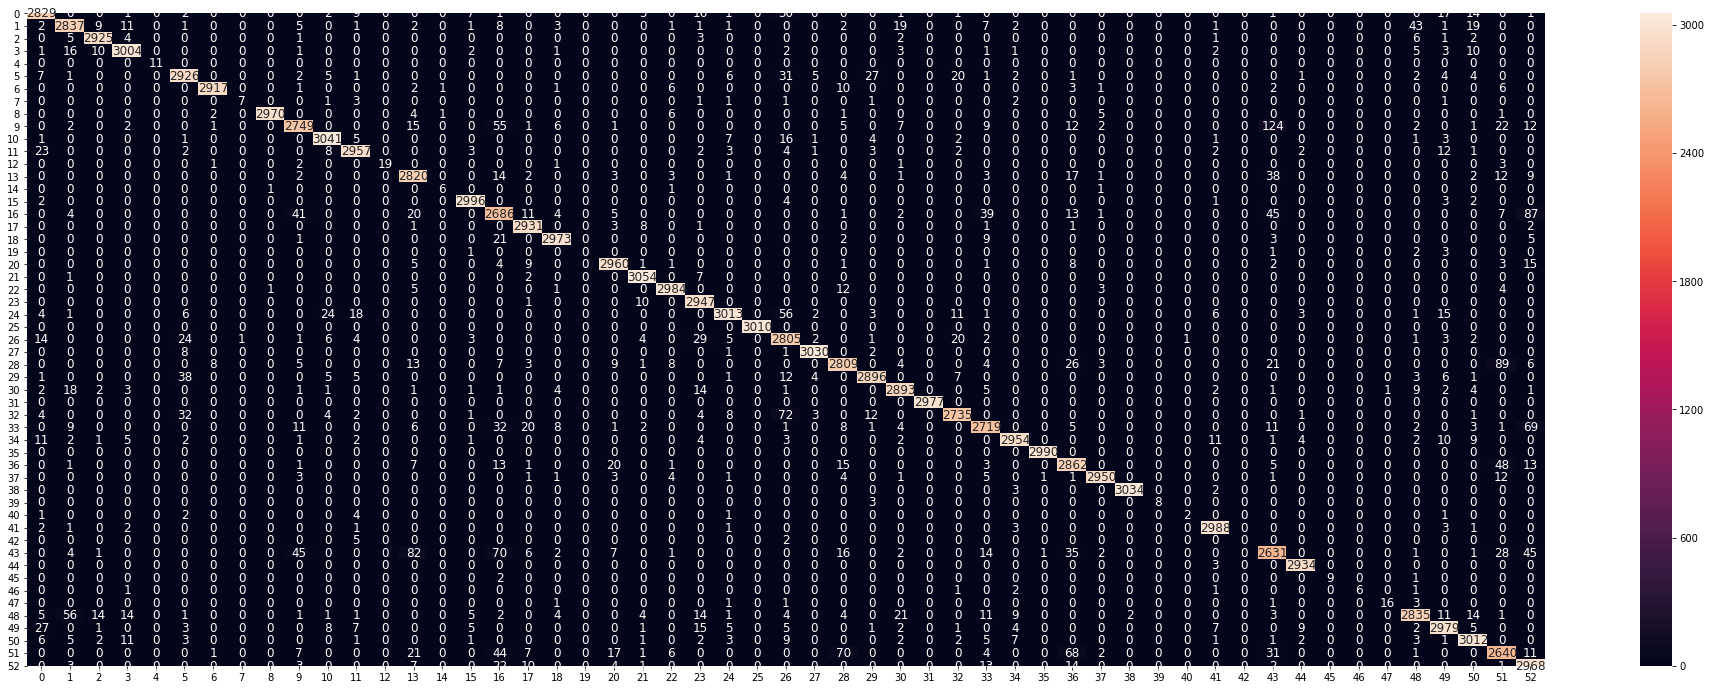

In [21]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(34,12)) 
sns.heatmap(cf_matrix,annot=True, ax=ax, fmt='d', annot_kws={"size": 12})
#plt.savefig("RF_cf2.png")

In [22]:
print(confusion_matrix(y_test, y_pred))

[[2829    0    0 ...   14    0    1]
 [   2 2837    9 ...   19    0    0]
 [   0    5 2925 ...    2    0    0]
 ...
 [   6    5    2 ... 3012    0    0]
 [   0    0    0 ...    0 2640   11]
 [   0    3    0 ...    0    1 2968]]


([<matplotlib.axis.XTick at 0x18af8eea5c8>,
 <a list of 78 Text xticklabel objects>)

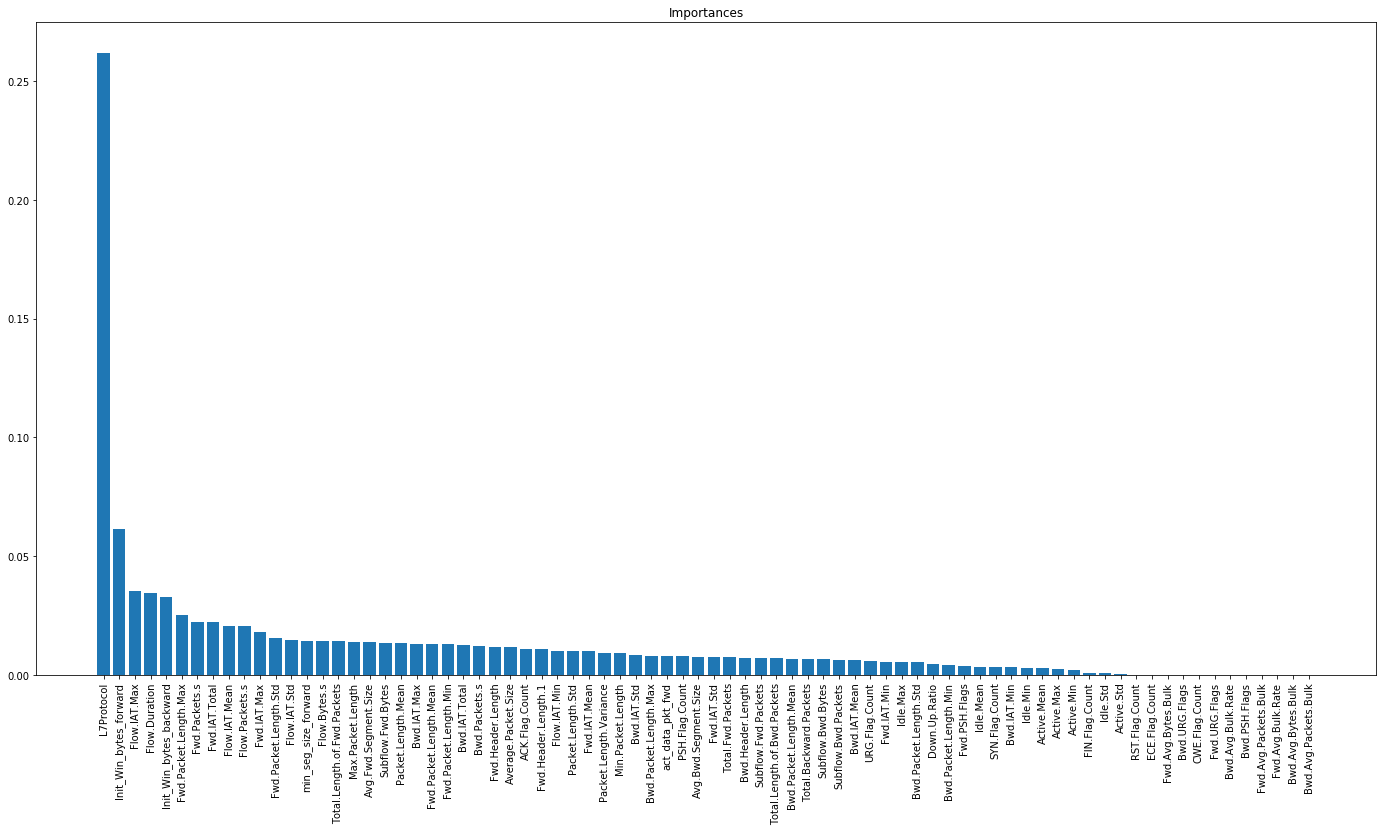

In [23]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [feats[i] for i in indices]
plt.figure(figsize=(24,12))
plt.title("Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# plt.savefig("RF_features.png")

In [32]:
%%time
# print(indices)
# print(names)
# for feature in zip(feats, importances):
#     print(feature)
# print("--- %s seconds ---" % (time.time() - start_time))

Wall time: 0 ns


In [30]:
for feature in zip(names, importances[indices]):
    print(feature)

('L7Protocol', 0.2616371619116137)
('Init_Win_bytes_forward', 0.06136059358045144)
('Flow.IAT.Max', 0.035396966784732295)
('Flow.Duration', 0.03439320352076211)
('Init_Win_bytes_backward', 0.03292306290365644)
('Fwd.Packet.Length.Max', 0.02520604385395336)
('Fwd.Packets.s', 0.022328815580946203)
('Fwd.IAT.Total', 0.022129249674120503)
('Flow.IAT.Mean', 0.020646896554662893)
('Flow.Packets.s', 0.020479156810907385)
('Fwd.IAT.Max', 0.017916747498122783)
('Fwd.Packet.Length.Std', 0.015452285010462932)
('Flow.IAT.Std', 0.014548120762387363)
('min_seg_size_forward', 0.014302024028740761)
('Flow.Bytes.s', 0.014119435534901158)
('Total.Length.of.Fwd.Packets', 0.014021403158302082)
('Max.Packet.Length', 0.013886305874487154)
('Avg.Fwd.Segment.Size', 0.013786355941081949)
('Subflow.Fwd.Bytes', 0.013541662191850054)
('Packet.Length.Mean', 0.013196476637715266)
('Bwd.IAT.Max', 0.012827530584884733)
('Fwd.Packet.Length.Mean', 0.012746513020600552)
('Fwd.Packet.Length.Min', 0.012733612505406349)
('

In [36]:
# Threshold 0.01
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_train, y_train)
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feats[feature_list_index])

Flow.Duration
Total.Length.of.Fwd.Packets
Fwd.Packet.Length.Max
Fwd.Packet.Length.Min
Fwd.Packet.Length.Mean
Fwd.Packet.Length.Std
Flow.Bytes.s
Flow.Packets.s
Flow.IAT.Mean
Flow.IAT.Std
Flow.IAT.Max
Flow.IAT.Min
Fwd.IAT.Total
Fwd.IAT.Mean
Fwd.IAT.Std
Fwd.IAT.Max
Bwd.IAT.Total
Bwd.IAT.Max
Fwd.Header.Length
Fwd.Packets.s
Bwd.Packets.s
Min.Packet.Length
Max.Packet.Length
Packet.Length.Mean
Packet.Length.Variance
ACK.Flag.Count
Average.Packet.Size
Avg.Fwd.Segment.Size
Fwd.Header.Length.1
Subflow.Fwd.Bytes
Init_Win_bytes_forward
Init_Win_bytes_backward
min_seg_size_forward
L7Protocol


In [37]:
selected_feat= X_train.columns[(sfm.get_support())]
# print(len(selected_feat))
print(selected_feat)

Index(['Flow.Duration', 'Total.Length.of.Fwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Bwd.IAT.Total', 'Bwd.IAT.Max', 'Fwd.Header.Length', 'Fwd.Packets.s',
       'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length',
       'Packet.Length.Mean', 'Packet.Length.Variance', 'ACK.Flag.Count',
       'Average.Packet.Size', 'Avg.Fwd.Segment.Size', 'Fwd.Header.Length.1',
       'Subflow.Fwd.Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'min_seg_size_forward', 'L7Protocol'],
      dtype='object')


In [ ]:
# from sklearn import tree
# import pydotplus
# estimator = rf.estimators_[7]
# dot_data = open("dtree.dot", 'w')
# tree.export_graphviz(estimator, out_file=dot_data)
# dot_data.close()
# dot_data = open("dtree.dot", 'r')
# dot_data = dot_data.read()
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png("Rf_tree.png")

In [39]:
X = df[selected_feat]
Y = df['ProtocolName']

,Flow.Duration,Total.Length.of.Fwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,...,Packet.Length.Variance,ACK.Flag.Count,Average.Packet.Size,Avg.Fwd.Segment.Size,Fwd.Header.Length.1,Subflow.Fwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,L7Protocol
0,320.0,6.0,6.0,6.0,6.0,0.0,75000.000000,12500.000000,106.666667,184.752086,...,0.0,1.0,7.5,6.0,20.0,6.0,65382.0,17688.0,20.0,178.0
1,274.0,6.0,6.0,6.0,6.0,0.0,65693.430657,10948.905109,137.000000,193.747258,...,0.0,1.0,8.0,6.0,20.0,6.0,65535.0,15544.0,20.0,178.0
2,209.0,6.0,6.0,6.0,6.0,0.0,86124.401914,14354.066986,104.500000,147.785317,...,0.0,1.0,8.0,6.0,20.0,6.0,65535.0,15544.0,20.0,178.0
3,201.0,6.0,6.0,6.0,6.0,0.0,89552.238806,14925.373134,100.500000,136.471609,...,0.0,1.0,8.0,6.0,20.0,6.0,64661.0,17688.0,20.0,178.0
4,134.0,6.0,6.0,6.0,6.0,0.0,89552.238806,14925.373134,134.000000,0.000000,...,0.0,1.0,9.0,6.0,20.0,6.0,65159.0,15544.0,20.0,178.0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
rf = RandomForestClassifier(max_depth=60, n_estimators=100, max_features='auto', criterion='entropy')
rf.fit(X_train , y_train)
rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

           AMAZON       0.99      0.99      0.99      2958
            APPLE       0.98      0.98      0.98      2977
     APPLE_ICLOUD       0.99      0.99      0.99      2950
     APPLE_ITUNES       0.99      0.99      0.99      3062
    CITRIX_ONLINE       1.00      1.00      1.00        11
       CLOUDFLARE       0.98      0.98      0.98      3046
    CONTENT_FLASH       1.00      1.00      1.00      2950
           DEEZER       1.00      0.39      0.56        18
              DNS       1.00      1.00      1.00      2990
          DROPBOX       0.99      0.96      0.97      3028
         EASYTAXI       0.99      1.00      0.99      3083
             EBAY       0.99      0.99      0.99      3025
          EDONKEY       1.00      0.70      0.83        27
         FACEBOOK       0.98      0.98      0.98      2932
      FTP_CONTROL       0.78      0.78      0.78         9
         FTP_DATA       1.00      1.00      1.00      3

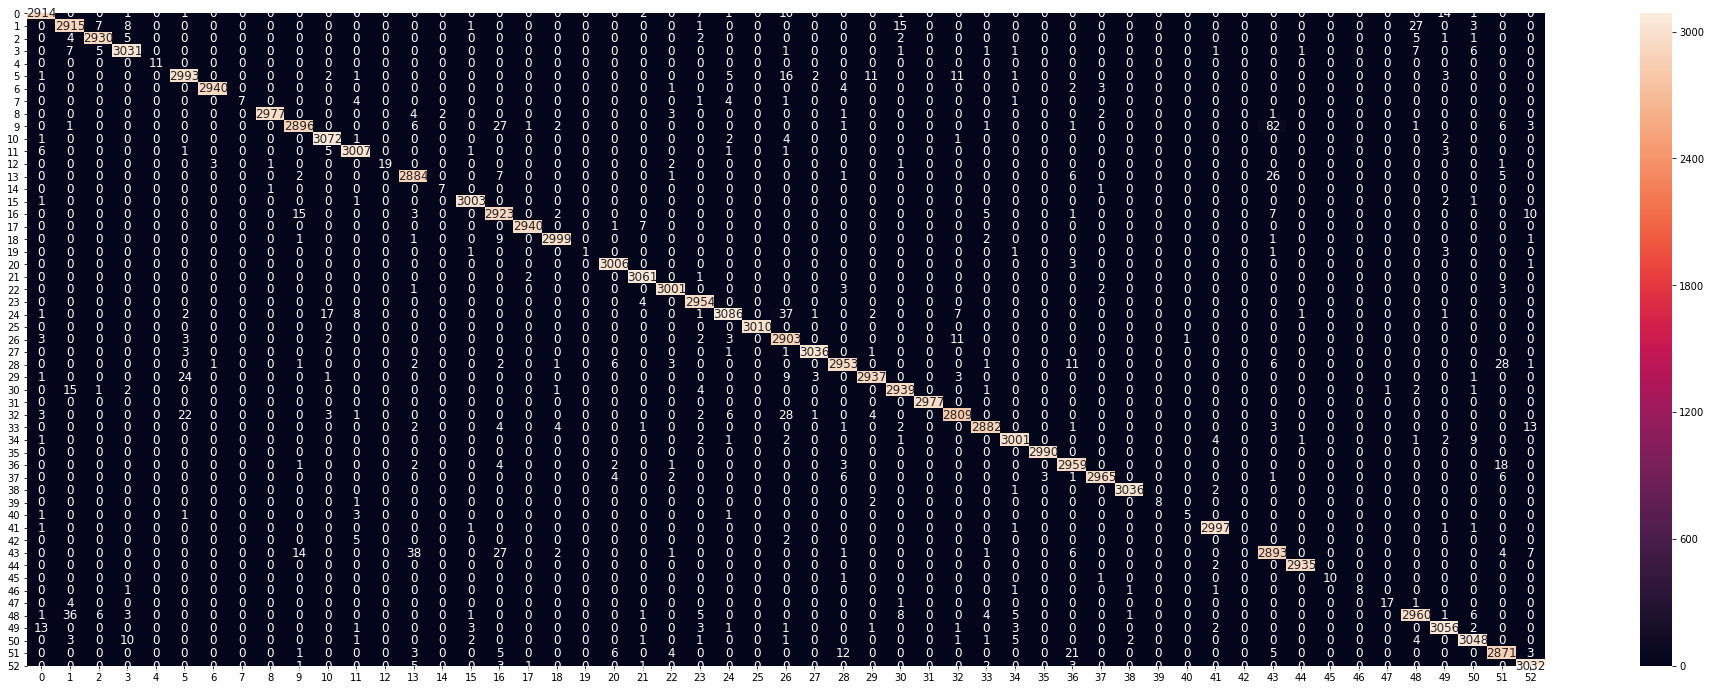

In [41]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(34,12)) 
sns.heatmap(cf_matrix,annot=True, ax=ax, fmt='d', annot_kws={"size": 12})
plt.savefig("RF_cf_with_important_features.png")

In [42]:
print(confusion_matrix(y_test, y_pred))

[[2914    0    0 ...    1    0    0]
 [   0 2915    7 ...    3    0    0]
 [   0    4 2930 ...    1    0    0]
 ...
 [   0    3    0 ... 3048    0    0]
 [   0    0    0 ...    0 2871    3]
 [   0    0    0 ...    0    0 3032]]


In [7]:
# pipe1 = Pipeline([('rf', RandomForestClassifier(max_depth=60, n_estimators=100, max_features='auto', criterion='entropy'))])


In [9]:
from sklearn.neighbors import KNeighborsClassifier
pipe2 = Pipeline([('knn', KNeighborsClassifier(n_neighbors = 3, metric='manhattan', weights='distance'))])
pipe2.fit(X_train , y_train)
pipe2.predict(X_test)

array(['EBAY', 'EASYTAXI', 'APPLE', ..., 'CLOUDFLARE', 'DNS',
       'APPLE_ITUNES'], dtype=object)

In [10]:
from joblib import dump
# dump the pipeline model
dump(pipe2, filename="KNN_traffic_classification.joblib")

['KNN_traffic_classification.joblib']

In [16]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=60))])

In [17]:
pipe.predict(X_train)

array(['DROPBOX', 'DNS', 'APPLE_ICLOUD', ..., 'DROPBOX', 'AMAZON',
       'APPLE'], dtype=object)

In [18]:
# from joblib import dump
# dump the pipeline model
dump(pipe, filename="RF_traffic_classification.joblib")

['RF_traffic_classification.joblib']

In [8]:
X_train.head()

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
246023,91.406833,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.0
356812,860185.000000,8.000000,32.000000,817.000000,904.000000,517.0,0.0,102.125000,184.089604,146.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0
316799,1007.000000,1.000000,1.000000,6.000000,6.000000,6.0,6.0,6.000000,0.000000,6.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0
264549,317.374877,3.597655,3.597655,172.687439,172.687439,48.0,48.0,48.000000,0.000000,48.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
385397,210361.519607,9.000000,4.377110,293.000000,3339.353494,208.0,0.0,32.555556,71.545634,1752.463512,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0


In [19]:
pipe.predict(X_test)

array(['DROPBOX', 'EASYTAXI', 'APPLE', ..., 'CLOUDFLARE', 'DNS',
       'APPLE_ITUNES'], dtype=object)

In [20]:
X_test

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
75721,3.800440e+05,13.000000,8.000000,6687.000000,2010.000000,4155.000000,6.000000,514.384600,1162.663000,867.000000,...,20.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,121.0
80184,1.705010e+05,9.000000,6.000000,964.000000,576.000000,482.000000,0.000000,107.111111,212.542022,288.000000,...,32.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,203.0
19864,3.098587e+07,9.292050,14.044349,855.129141,4344.966378,463.632732,0.000000,94.212834,195.445198,1399.392094,...,32.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,140.0
76699,1.193623e+08,51.000000,79.000000,7492.000000,11905.000000,257.000000,42.000000,146.901961,108.044668,517.000000,...,32.000000,3.069091e+06,2.661983e+06,6866502.0,125057.0,1.681856e+07,1.080595e+07,33195284.0,5836977.0,121.0
92991,3.451331e+05,10.267905,27.468435,1319.789925,27736.688299,735.169765,0.000000,124.364431,257.480532,4042.508225,...,23.042971,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42648,1.530000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,32.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,220.0
86306,5.805851e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,32.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,203.0
45466,2.800000e+01,2.000000,0.000000,12.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,220.0
63724,1.297646e+03,3.732996,2.465992,130.397976,449.843115,35.403036,35.403036,35.403036,0.000000,209.420445,...,20.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,5.0


In [10]:
len(X_test)

126151

In [12]:
X_test['prediction'] = pipe.predict(X_test)
X_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,prediction
302,3.472000e+03,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,6.0,...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,178.0,AMAZON
252870,4.704551e+07,3.0,5.0,18.0,30.0,6.0,6.0,6.000000,0.000000,6.0,...,0.000000,0.0,0.000000,0.000000,4.499907e+07,0.0,4.499907e+07,4.499907e+07,133.0,NETFLIX
371410,4.304930e+05,9.0,7.0,790.0,3500.0,457.0,0.0,87.777778,157.412498,1436.0,...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,142.0,WHATSAPP
157899,1.113500e+04,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,6.0,...,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,7.0,SSL
64185,8.275282e+07,4.0,0.0,180.0,0.0,45.0,45.0,45.000000,0.000000,0.0,...,13.916575,0.0,13.916575,13.916575,8.275278e+07,0.0,8.275278e+07,8.275278e+07,5.0,DNS


In [21]:
# newTestData = X_test[:10]
X_test.to_csv('TestData2.csv', index=False)

In [12]:
newTestData.head()

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
302,3.472000e+03,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,6.0,...,20.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,178.0
252870,4.704551e+07,3.0,5.0,18.0,30.0,6.0,6.0,6.000000,0.000000,6.0,...,20.0,0.000000,0.0,0.000000,0.000000,4.499907e+07,0.0,4.499907e+07,4.499907e+07,133.0
371410,4.304930e+05,9.0,7.0,790.0,3500.0,457.0,0.0,87.777778,157.412498,1436.0,...,32.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,142.0
157899,1.113500e+04,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,6.0,...,20.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,7.0
64185,8.275282e+07,4.0,0.0,180.0,0.0,45.0,45.0,45.000000,0.000000,0.0,...,20.0,13.916575,0.0,13.916575,13.916575,8.275278e+07,0.0,8.275278e+07,8.275278e+07,5.0


In [13]:
newTestData.to_csv('TestData.csv', index=False)